In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive")
DATA_DIR = '/content/drive/My Drive/KDD_DataSet'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(DATA_DIR + '/weekly_housing_market_data_most_recent.tsv', sep='\t')

In [ ]:
cleaned_df = df[["period_begin","period_end","region_name","region_type","pending_sales", "total_new_listings", "total_homes_sold", "median_sale_price", "off_market_in_one_week", "inventory", "price_drops"]]

In [ ]:
cleaned_df.sort_values(by=['period_begin'], ascending=True)

,period_begin,period_end,region_name,region_type,pending_sales,total_new_listings,total_homes_sold,median_sale_price,off_market_in_one_week,inventory,price_drops
1561947,2017-01-02,2017-03-26,"Kewaunee County, WI",county,1.0,45.0,43.0,120672.7,0.0,89.0,1.0
1739585,2017-01-02,2017-03-26,"Williamson County, TX",county,146.0,2871.0,1744.0,263879.5,66.0,1797.0,102.0
1189602,2017-01-02,2017-01-29,"Bay County, MI",county,NaN,1.0,NaN,NaN,NaN,10.0,NaN
902049,2017-01-02,2017-01-29,"Lumpkin County, GA",county,1.0,24.0,22.0,150110.0,0.0,166.0,NaN
1644484,2017-01-02,2017-03-26,"Spartanburg County, SC",county,28.0,1100.0,665.0,157223.3,2.0,1260.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...
51994,2021-10-18,2021-10-24,"Lawrence County, MS",county,1.0,NaN,NaN,NaN,0.0,NaN,NaN
52008,2021-10-18,2021-10-24,"Solano County, CA",county,56.0,110.0,101.0,565000.0,2.0,717.0,28.0
219552,2021-10-18,2021-10-24,"Allegan County, MI",county,32.0,31.0,38.0,279950.0,14.0,143.0,6.0
27024,2021-10-18,2021-10-24,"Estill County, KY",county,6.0,3.0,4.0,122000.0,2.0,26.0,1.0


In [ ]:
filtered_df = cleaned_df[(cleaned_df['period_begin']> "2019-01-01") & (cleaned_df['period_begin']< "2021-11-01")]

In [ ]:
def get_q_data(filtered_df ,region_name, region_type, field):
  filtered_df = filtered_df[(filtered_df['region_name'] == region_name) & (filtered_df['region_type'] == region_type)]
  filtered_df.period_begin = pd.to_datetime(df.period_begin)
  filtered_df.set_index('period_begin', inplace=True)
  filtered_df = filtered_df.resample('QS').sum()
  quarterly_metro_df = pd.DataFrame(columns = ['Date', 'region_name', 'region_type' , field])
  for a in filtered_df.iterrows():
    quarterly_metro_df = quarterly_metro_df.append({'Date' : pd.to_datetime(a[0]).date(), field : a[1][0], 'region_name' :  region_name, 'region_type' : region_type}, 
                ignore_index = True)  
  return quarterly_metro_df

In [ ]:
quarterly_metro_df1 = get_q_data(filtered_df, 'Boston, MA metro area', 'metro', 'pending_sales')
quarterly_metro_df2 = get_q_data(filtered_df, 'Chicago, IL metro area', 'metro', 'pending_sales')
frames = [quarterly_metro_df1, quarterly_metro_df2]
quarterly_metro_df = pd.concat(frames)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


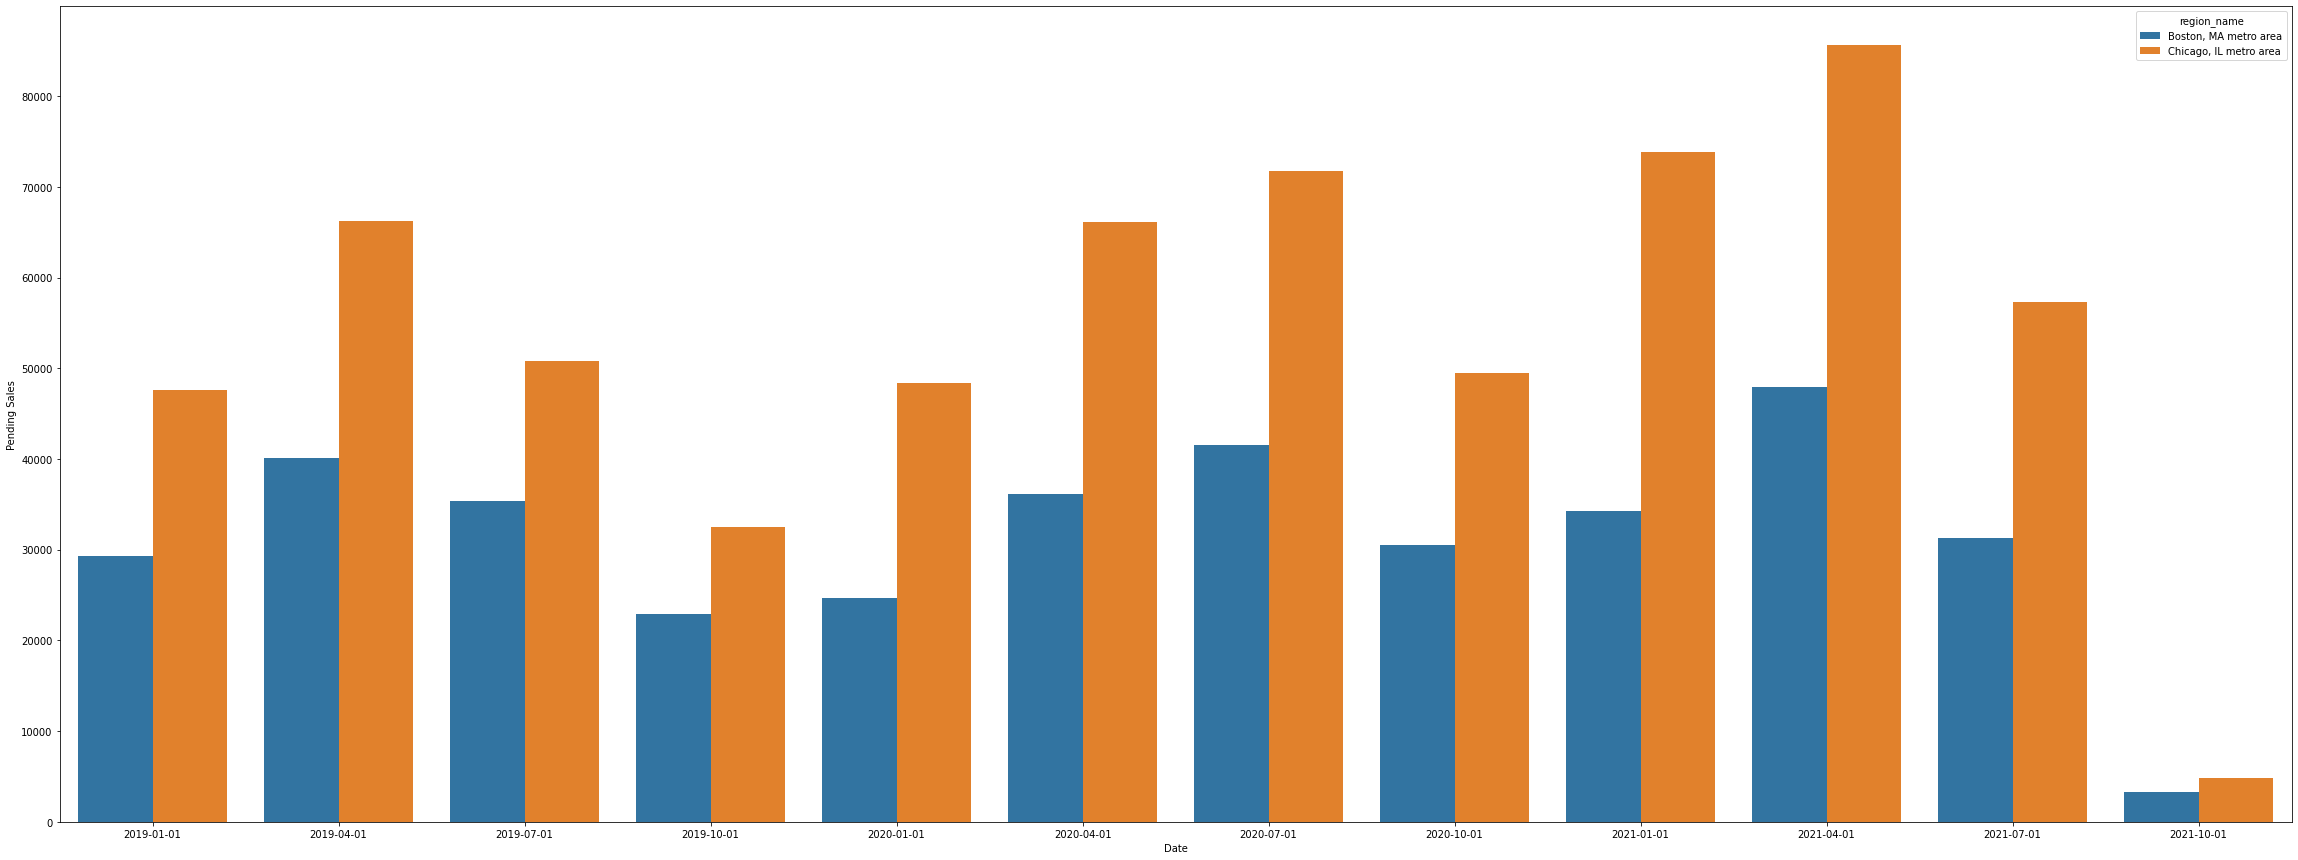

In [ ]:

ax = sb.barplot(x='Date', y='pending_sales', hue='region_name' ,data=quarterly_metro_df)
plt.xlabel('Date')
plt.ylabel('Pending Sales')
plt.gcf().set_size_inches(40, 15)
plt.show()

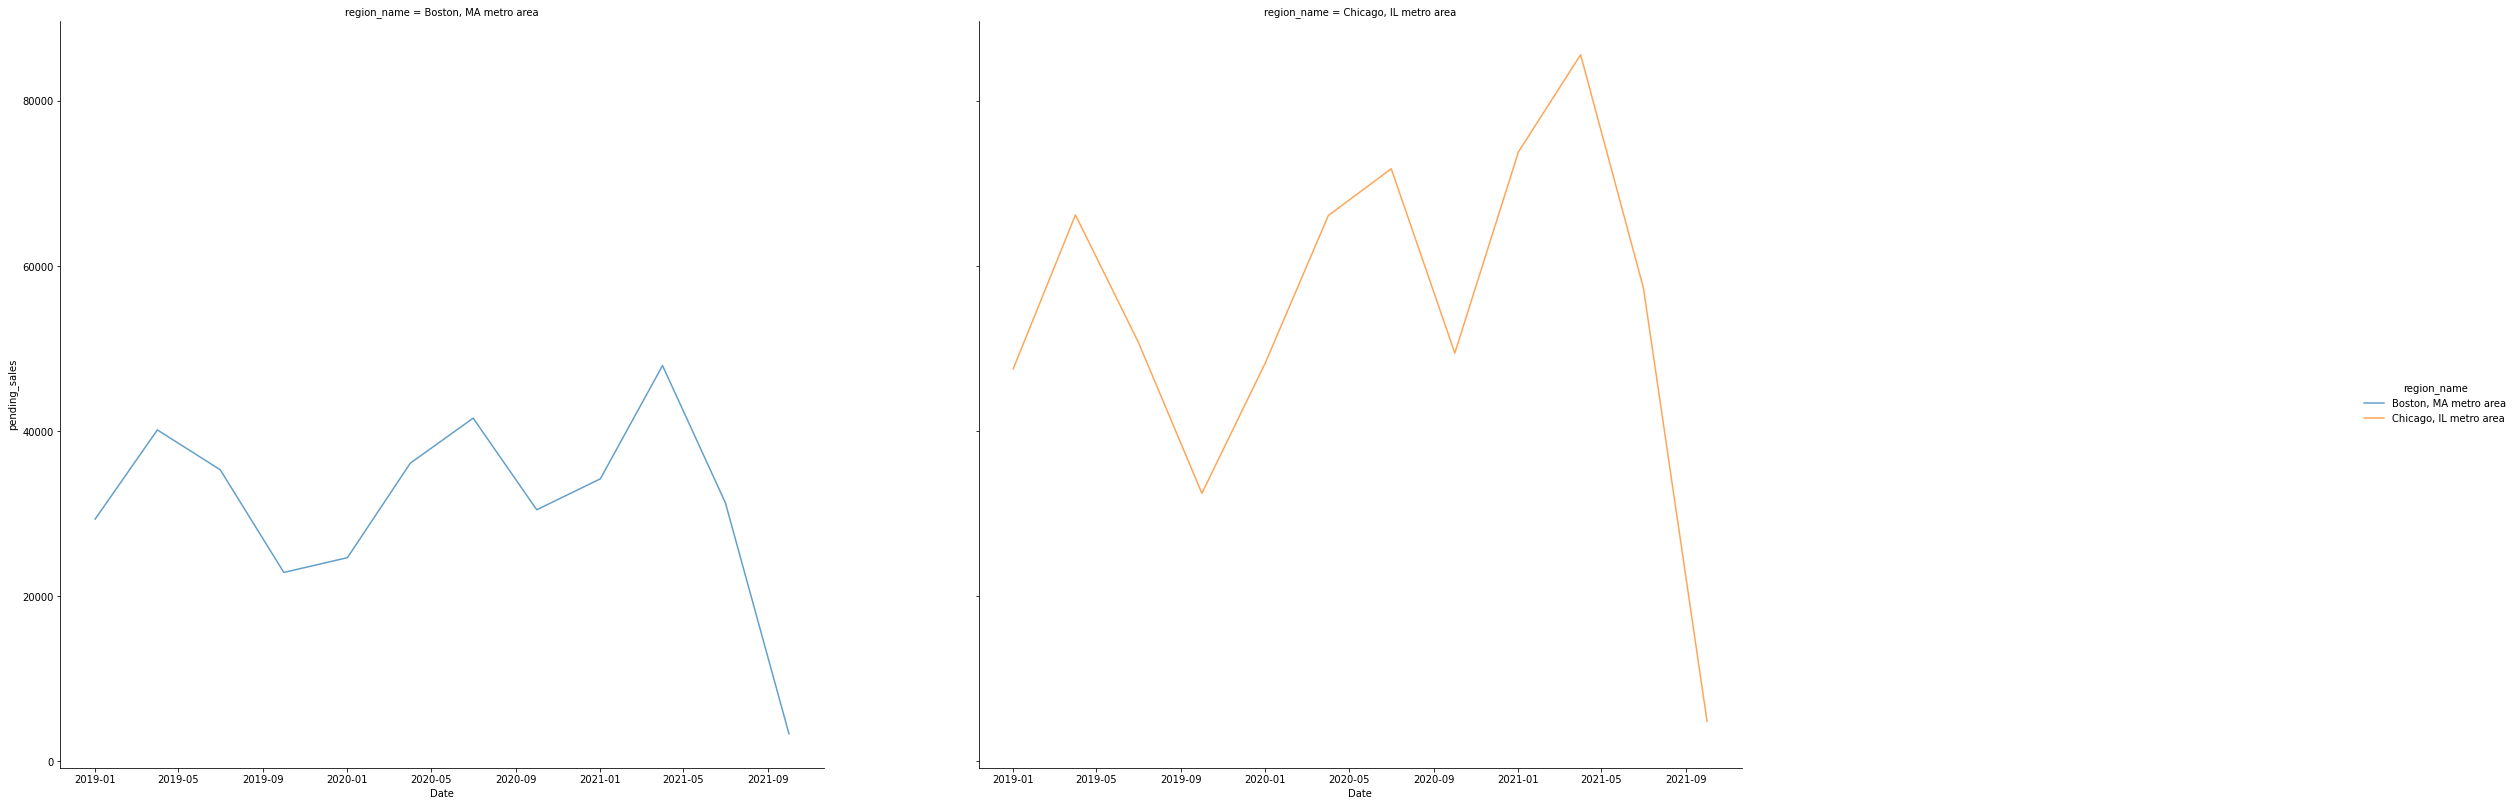

In [ ]:

g = sb.FacetGrid(quarterly_metro_df, col="region_name", hue="region_name")
g.map(sb.lineplot, "Date", "pending_sales", alpha=.7)
g.add_legend()
plt.gcf().set_size_inches(40, 15)
plt.show()

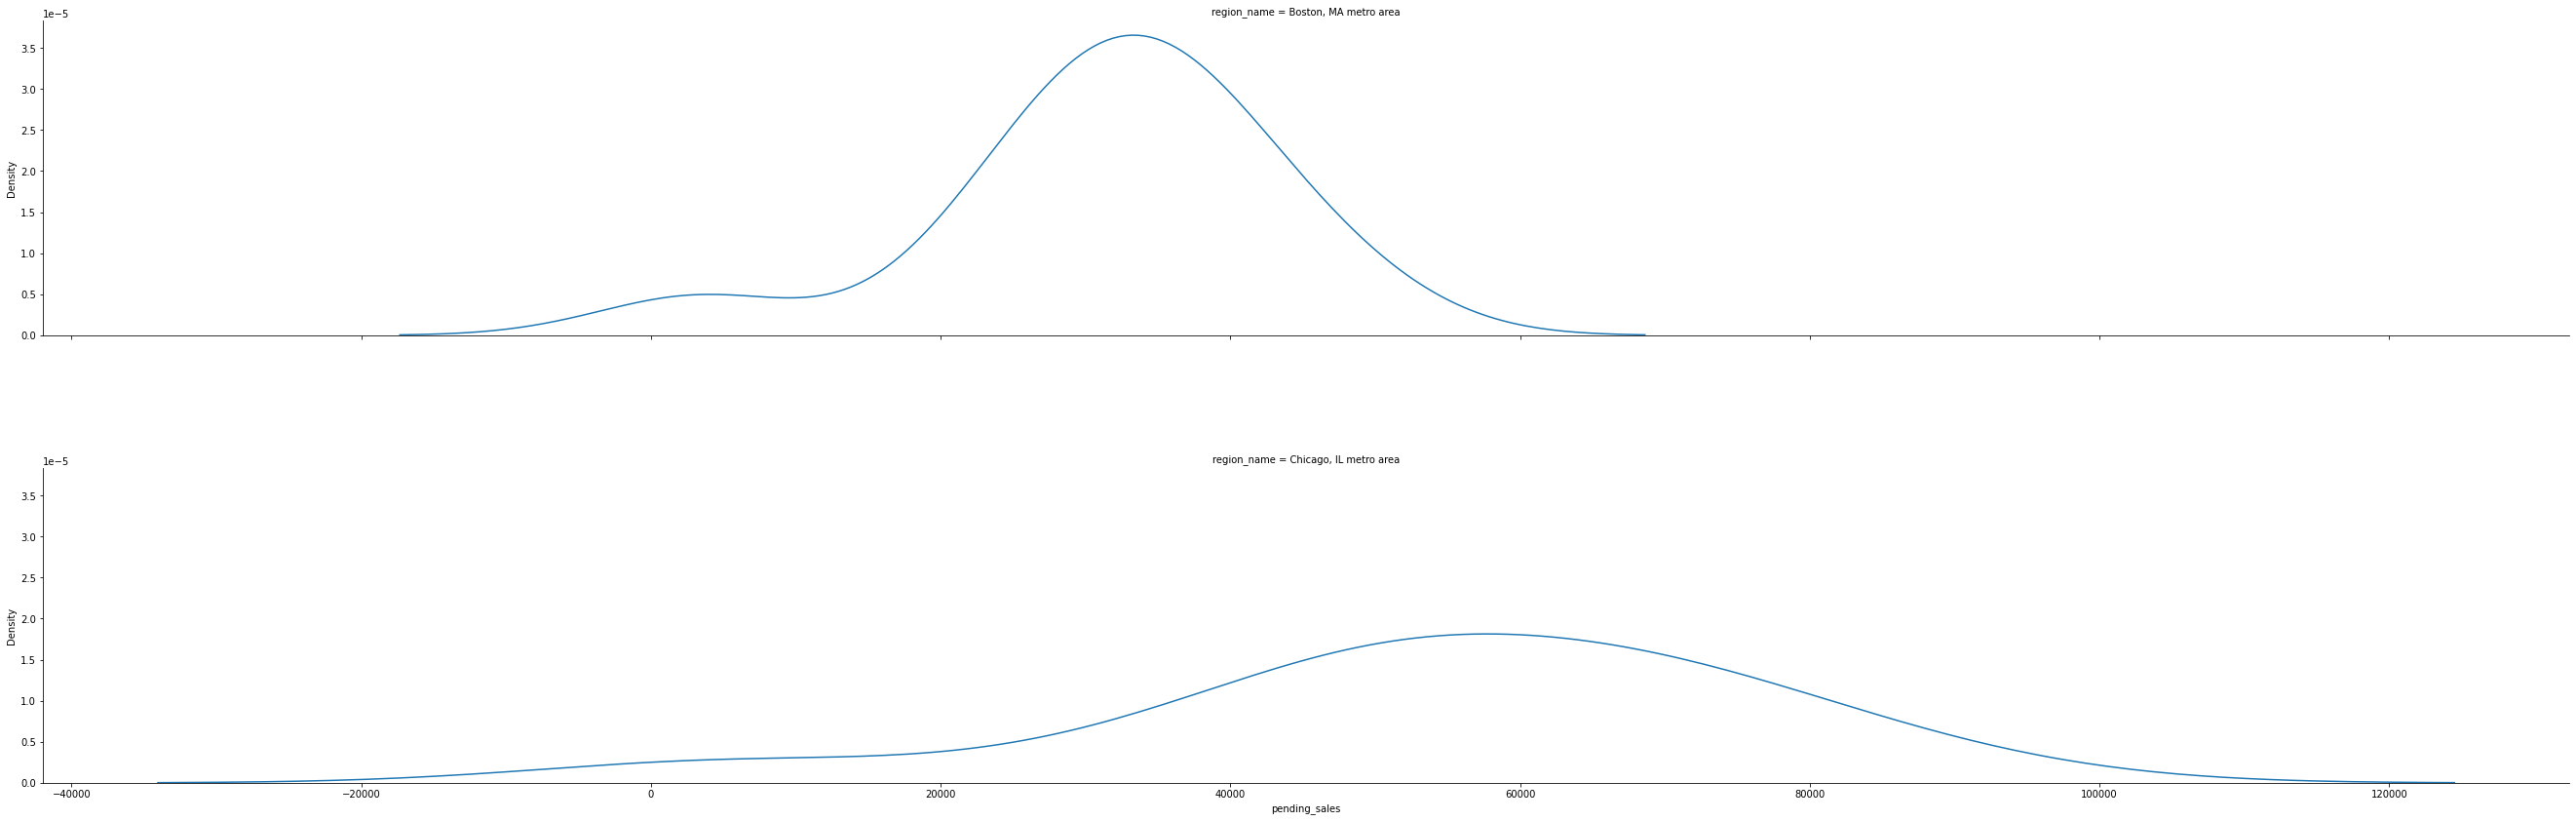

In [ ]:

g = sb.FacetGrid(quarterly_metro_df, row="region_name",
                  height=1.7, aspect=4,)
g.map(sb.kdeplot, "pending_sales")
plt.gcf().set_size_inches(40, 15)
plt.show()


## Pending Sales
#### From the above graph we can see that from January 2019 to April 2019 the number of pending sales increased with a difference of $220K, from June 2019 to jan 2020 there is a steady decrease in pending sales, from Feb 202 to July 2020 there is an increase and remains steady till October 2020, then there is a steep decrease from Nov 2020 till Jan 2021, later numbers increase till May 2021 and remain constant till Sep 2021. 

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


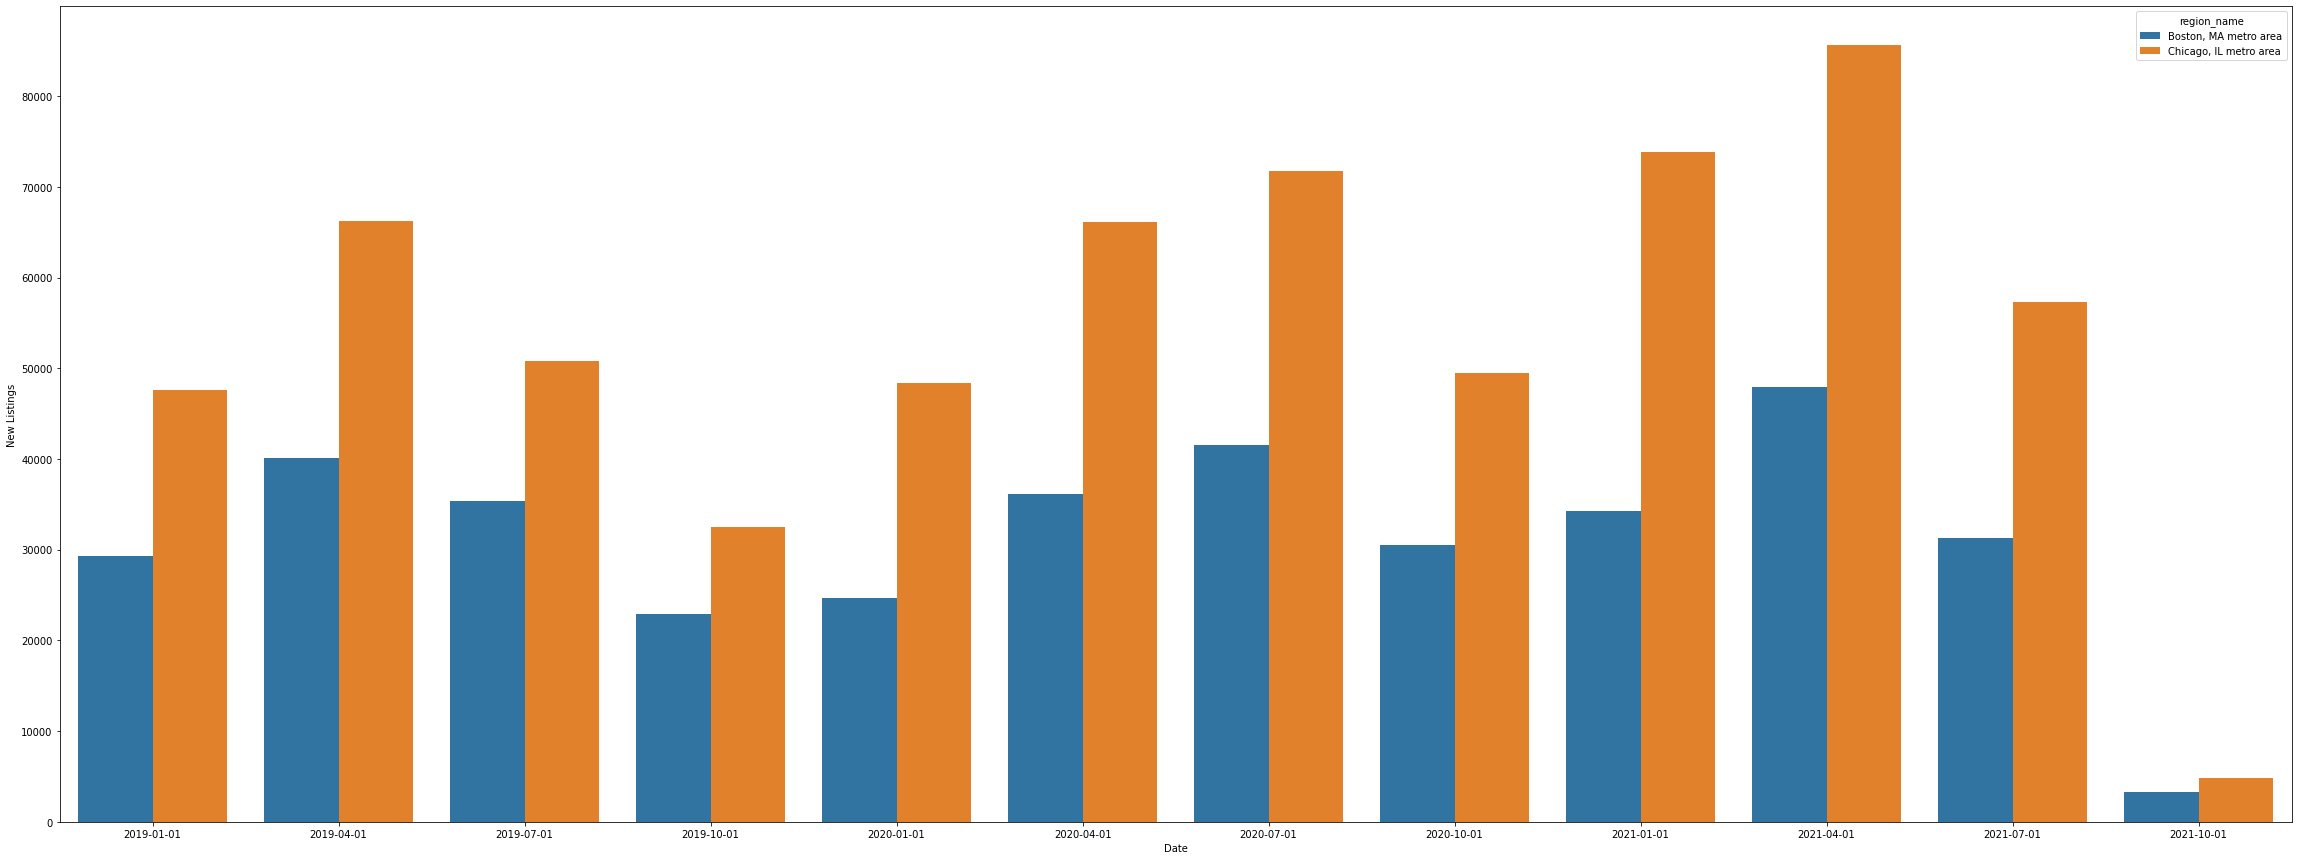

In [ ]:
quarterly_metro_df1 = get_q_data(filtered_df, 'Boston, MA metro area', 'metro', 'total_new_listings')
quarterly_metro_df2 = get_q_data(filtered_df, 'Chicago, IL metro area', 'metro', 'total_new_listings')
frames = [quarterly_metro_df1, quarterly_metro_df2]
quarterly_metro_df = pd.concat(frames)
ax = sb.barplot(x='Date', y='total_new_listings', hue='region_name' ,data=quarterly_metro_df)
plt.xlabel('Date')
plt.ylabel('New Listings')
plt.gcf().set_size_inches(40, 15)
plt.show()

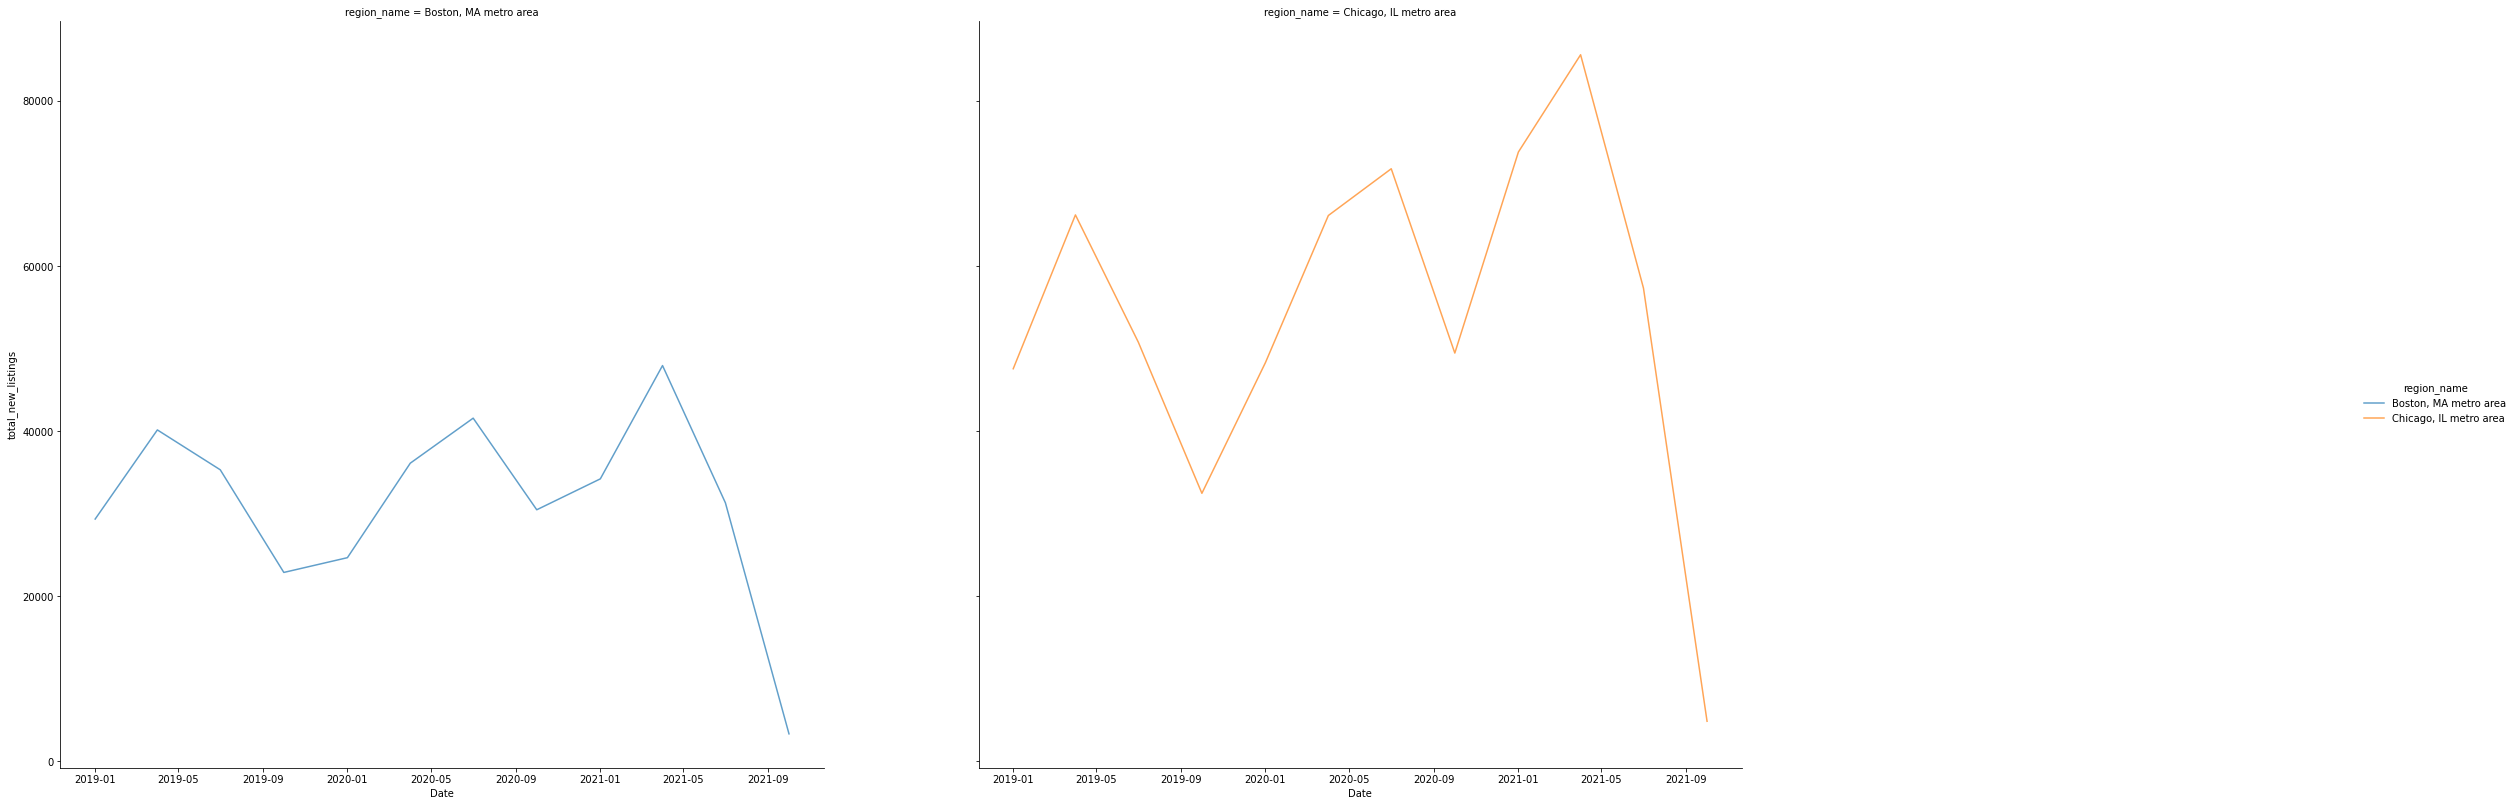

In [ ]:
g = sb.FacetGrid(quarterly_metro_df, col="region_name", hue="region_name")
g.map(sb.lineplot, "Date", "total_new_listings", alpha=.7)
g.add_legend()
plt.gcf().set_size_inches(40, 15)
plt.show()

### New listings
#### Low inventory was a problem in United State even before COVID-19 hit, but as the pandemic stroked, the demand started to rise exponentially and more people chose to list their properties. A smaller inventory means prices across the region continued to rise and sellers had the advantage over buyers. Considering an example : In a 90 days period, the listening recorded nationwide during December 2019 were 324,306 which rose to about 666,607 by March 2020 which was nearly marked as the beginning of Covid in United States. Even during the Covid-19 the market remain high in flames list November 2020. It again rose tremendously in March 2021 and remained stable after that. Inventory played a major role and the seller had multiple offers for the house which encouraged more and more sellers to list their house during that time.

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


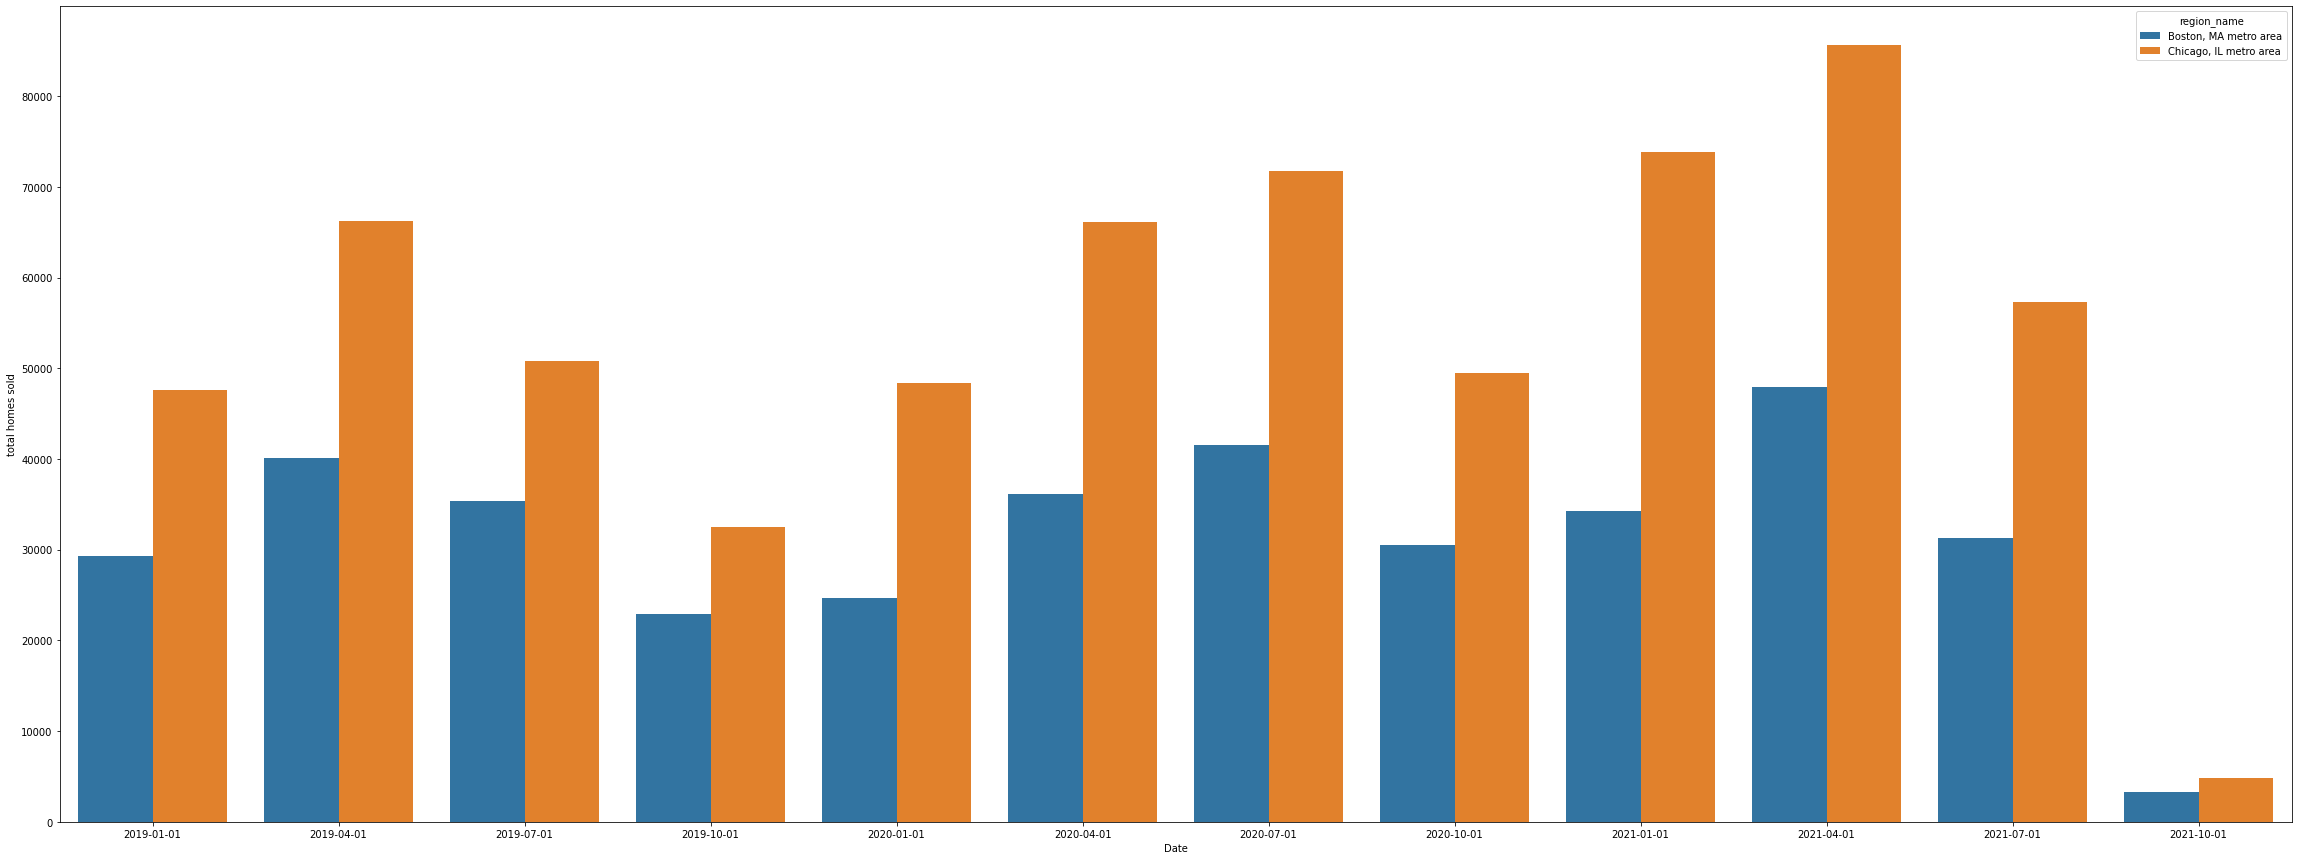

In [ ]:
quarterly_metro_df1 = get_q_data(filtered_df, 'Boston, MA metro area', 'metro', 'total_homes_sold')
quarterly_metro_df2 = get_q_data(filtered_df, 'Chicago, IL metro area', 'metro', 'total_homes_sold')
frames = [quarterly_metro_df1, quarterly_metro_df2]
quarterly_metro_df = pd.concat(frames)
ax = sb.barplot(x='Date', y='total_homes_sold', hue='region_name' ,data=quarterly_metro_df)
plt.xlabel('Date')
plt.ylabel('total homes sold')
plt.gcf().set_size_inches(40, 15)
plt.show()

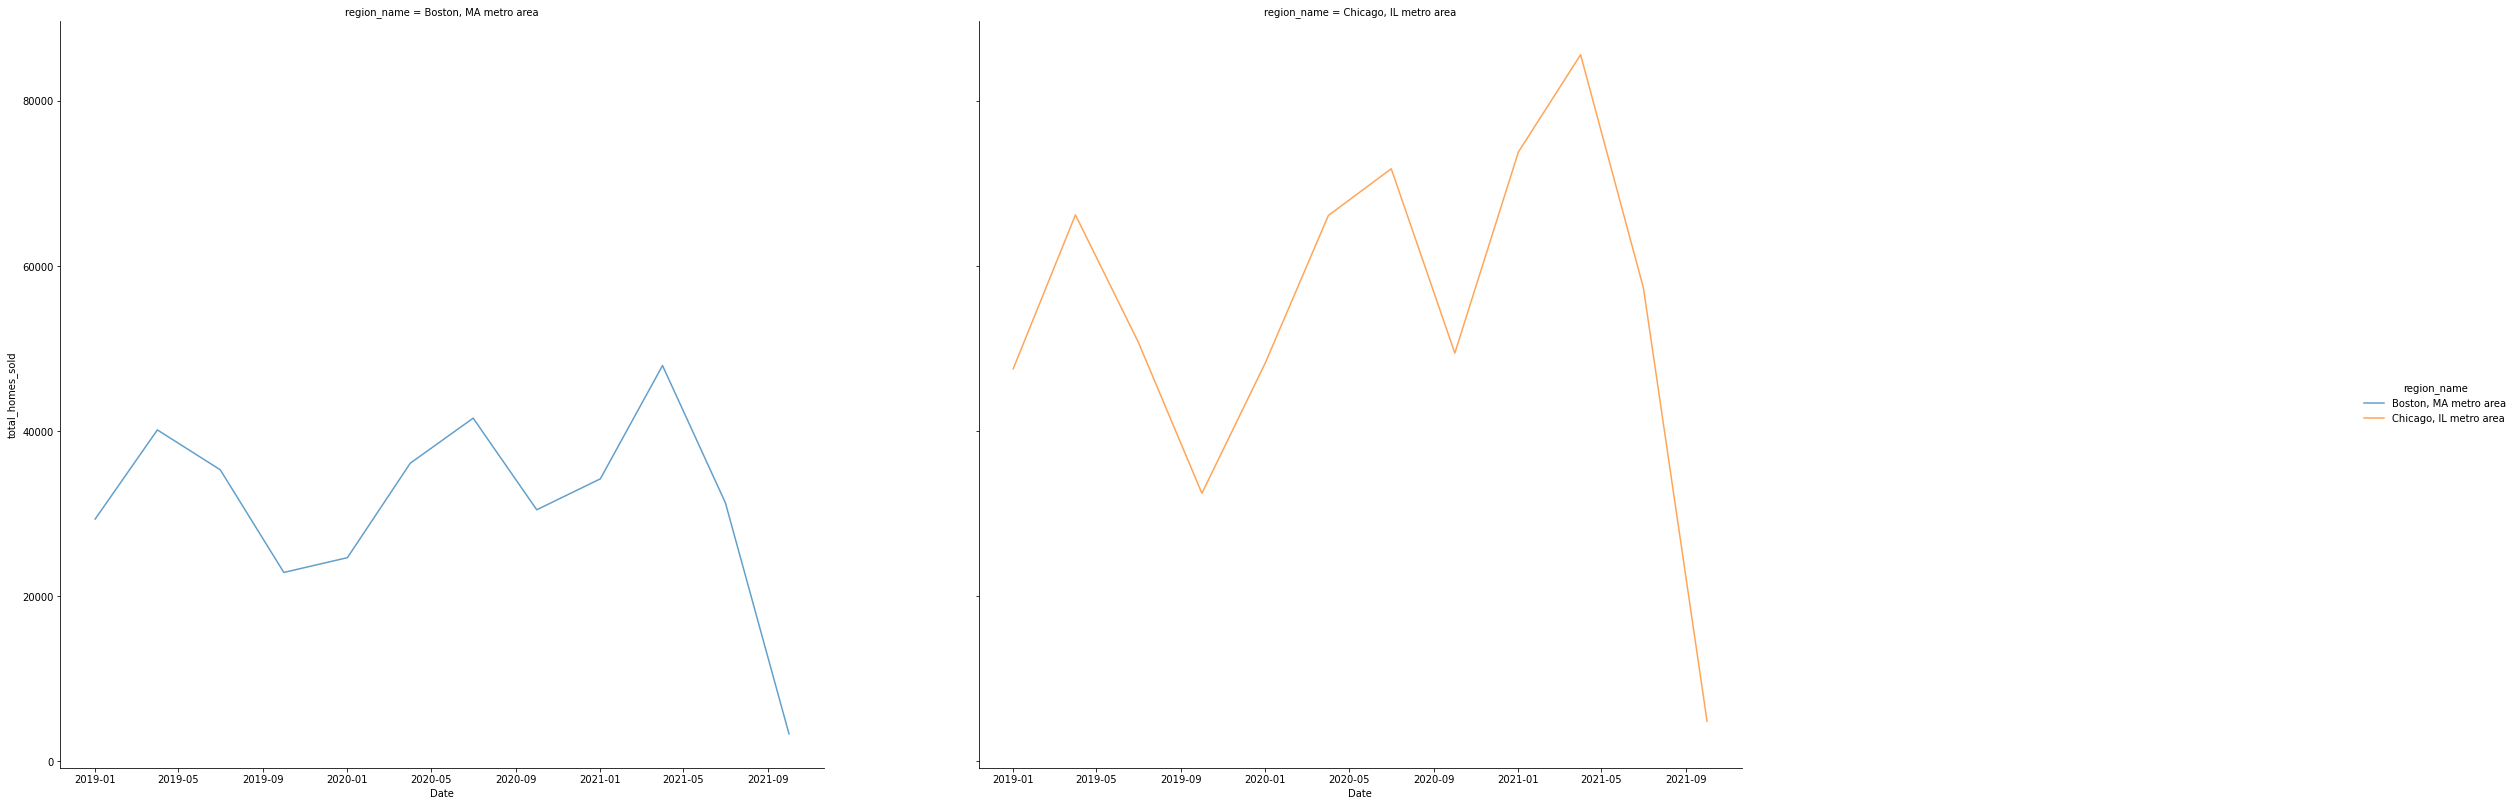

In [ ]:
g = sb.FacetGrid(quarterly_metro_df, col="region_name", hue="region_name")
g.map(sb.lineplot, "Date", "total_homes_sold", alpha=.7)
g.add_legend()
plt.gcf().set_size_inches(40, 15)
plt.show()

### Homes sold
#### The bar and line plots show that over the period of pandemic, from 2019 to 2021, out of the three metro areas, Boston-MA and Chicago-IL, Chicago has the highest home sales.
#### Coming to  Boston, the former mostly had higher sales than the latter, except for the period in between February 2020 and May 2020.
#### The highest sales in all the areas was around April 2021. In Chicago highest sales are more than 500k, in New York it is around 400k, in Boston it is around 300k.
#### At the beginning of the pandemic from January 2020 to April 2020 the Nationwide Sold Above List rose to 2.9%. Whereas from April 2020 to May 2020 it drops to 3.3%. Again, from May 2020 to July 2021, the Nationwide sold About List increase to 26.5%. From July 2021 to September 2021 the Sold Above List drops to 1.4%.
#### More than half of the homes on the market are selling over their list price. Low interest rates combined with increased working from home have dramatically driven demand upward for single–family homes in many areas. In the current market, where there is more demand of home than supply of homes, a buyer often needs to make an offer above asking price to finish their deal. That’s especially true when there are multiple competing offers or a bidding war. Offers typically need to exceed at least 1 to 3 percent over list price when there are multiple competing buyers. For example, if a home is priced at $350,000, a winning offer might be as much as $3,500 to $10,500 or above that. More than half of the homes on the market are selling over their list price.

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


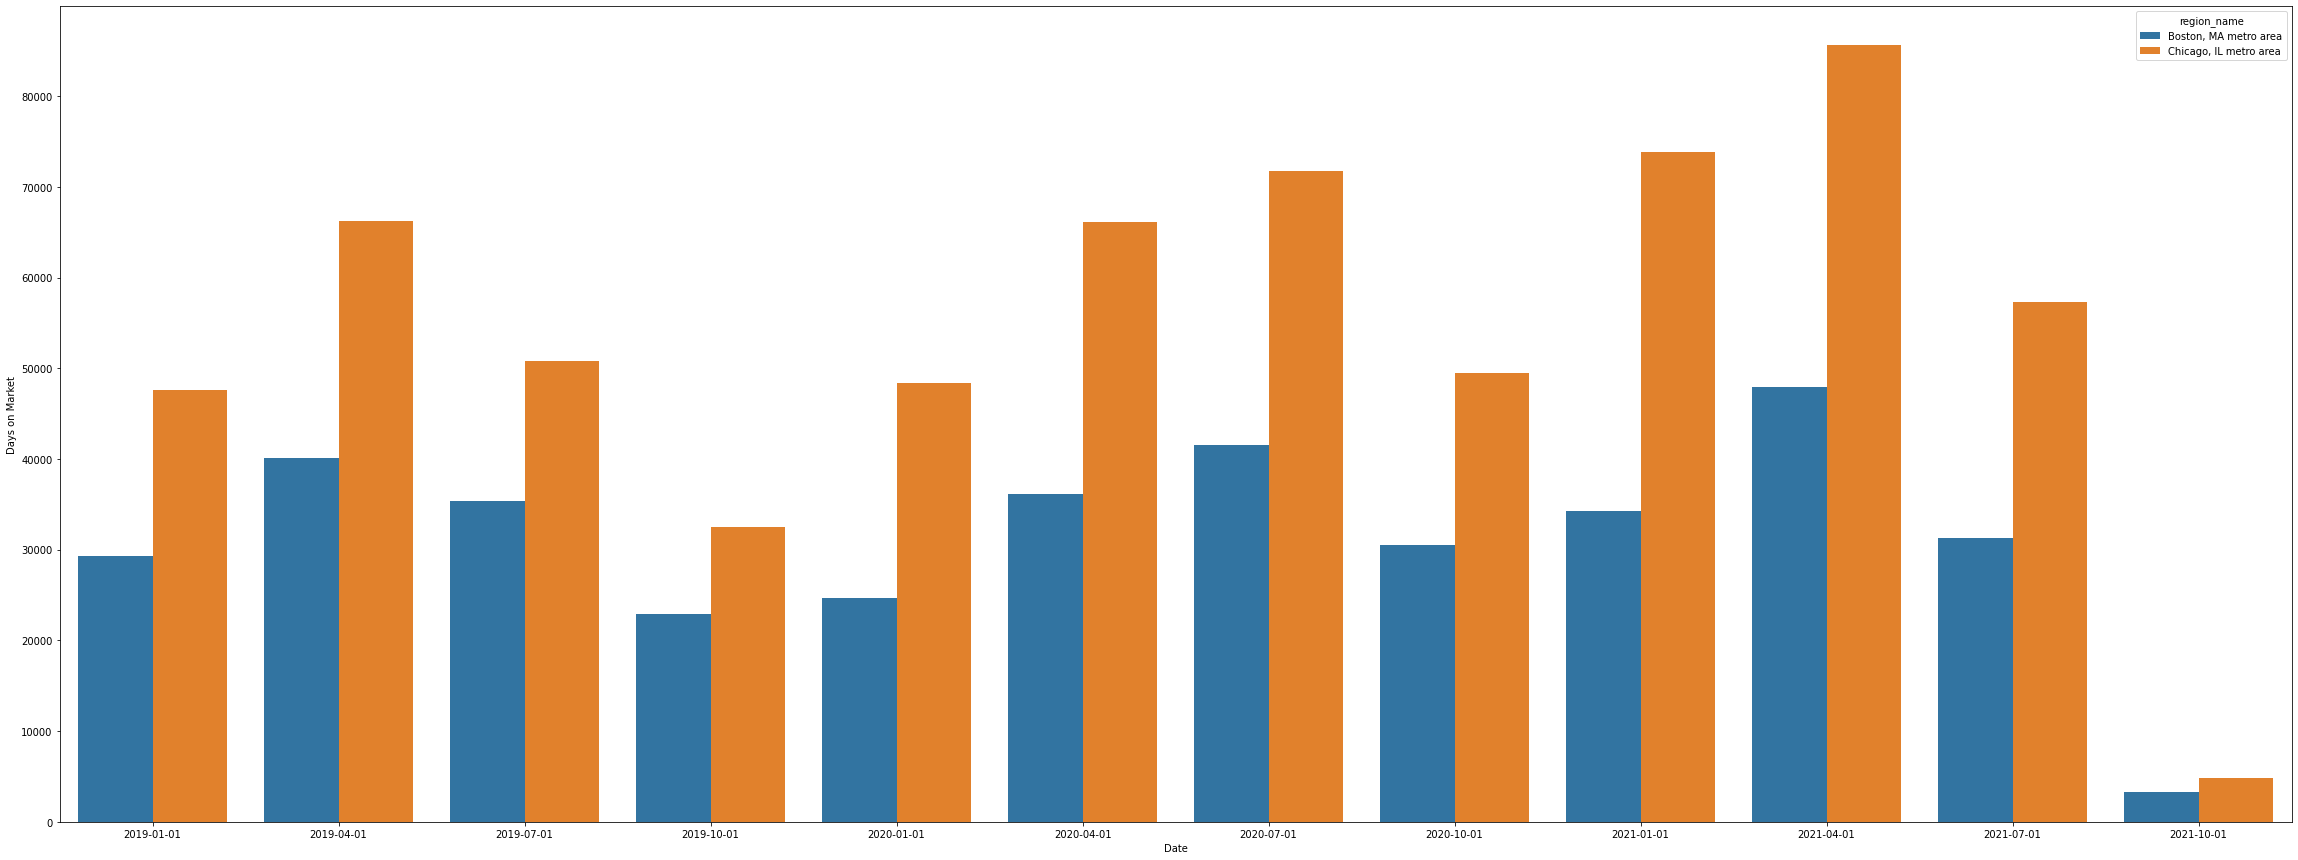

In [ ]:
quarterly_metro_df1 = get_q_data(filtered_df, 'Boston, MA metro area', 'metro', 'off_market_in_one_week')
quarterly_metro_df2 = get_q_data(filtered_df, 'Chicago, IL metro area', 'metro', 'off_market_in_one_week')
frames = [quarterly_metro_df1, quarterly_metro_df2]
quarterly_metro_df = pd.concat(frames)
ax = sb.barplot(x='Date', y='off_market_in_one_week', hue='region_name' ,data=quarterly_metro_df)
plt.xlabel('Date')
plt.ylabel('Days on Market')
plt.gcf().set_size_inches(40, 15)
plt.show()

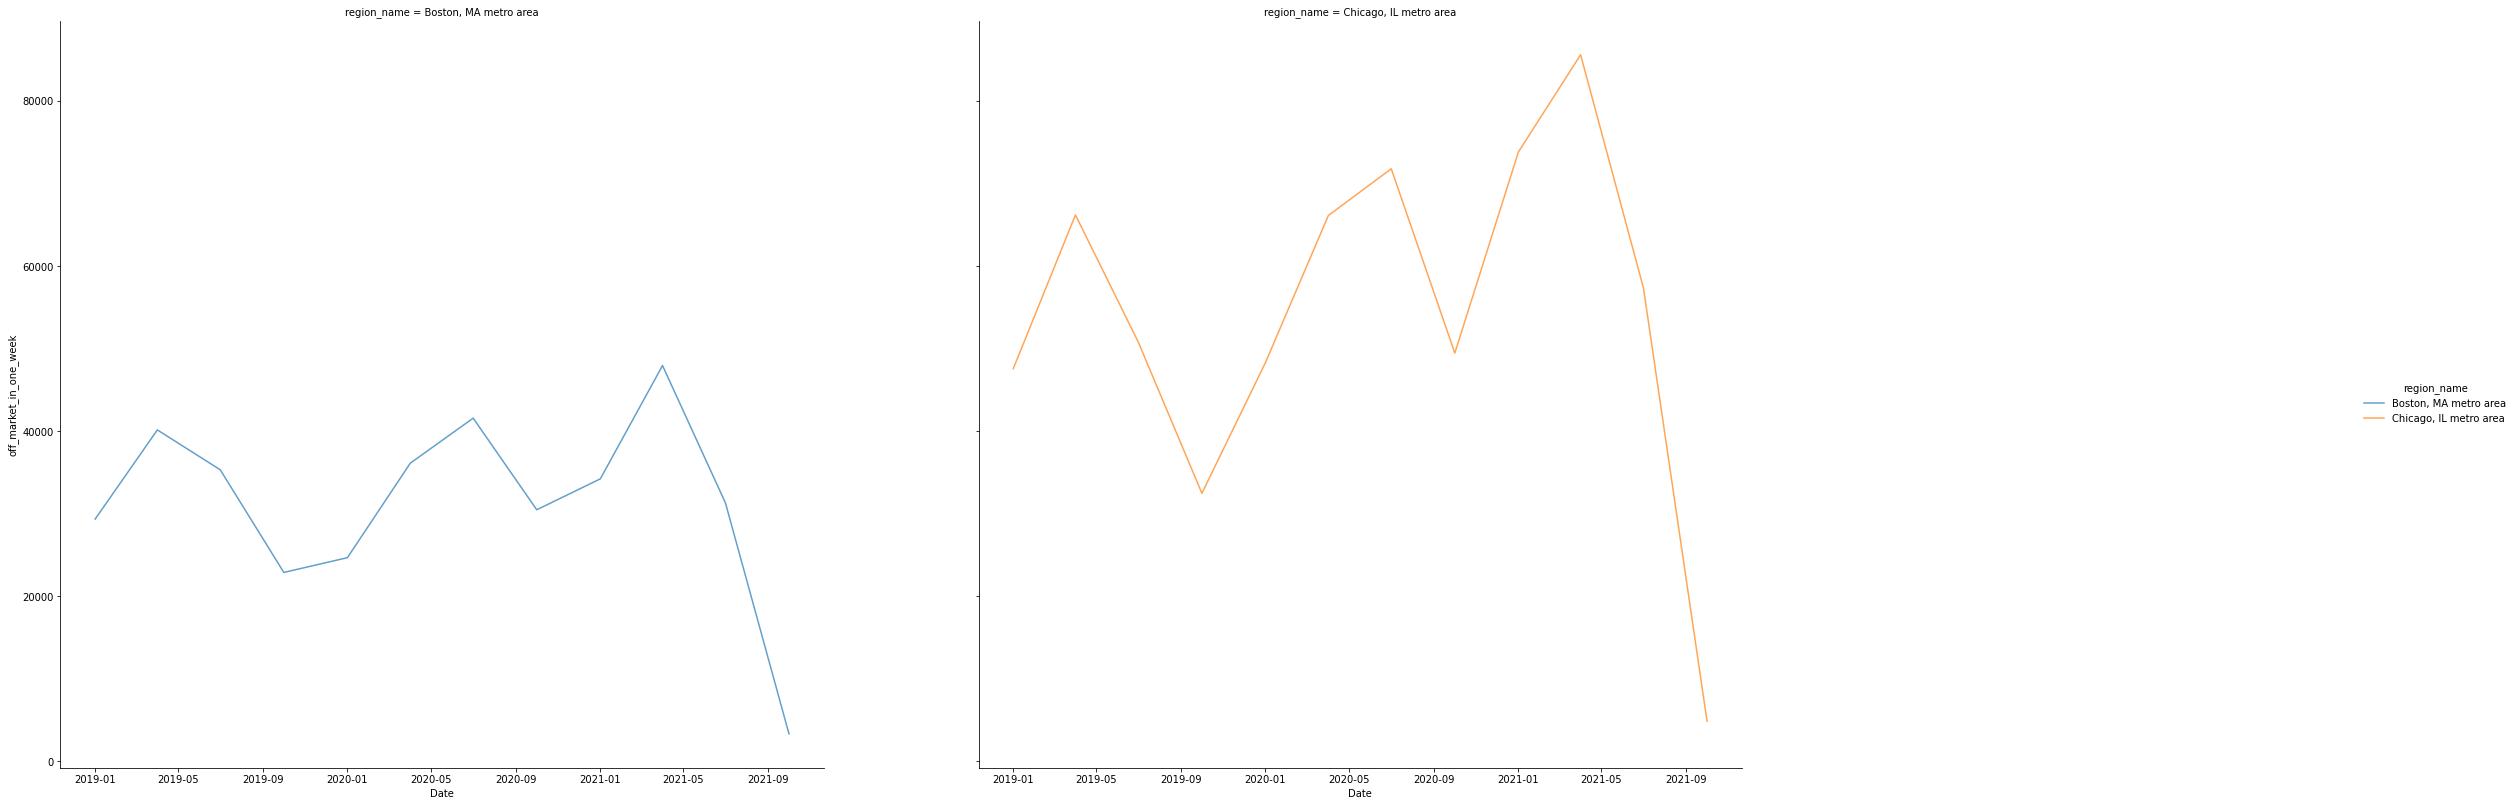

In [ ]:
g = sb.FacetGrid(quarterly_metro_df, col="region_name", hue="region_name")
g.map(sb.lineplot, "Date", "off_market_in_one_week", alpha=.7)
g.add_legend()
plt.gcf().set_size_inches(40, 15)
plt.show()

### Days on Market 
#### From the graph, it was observed that the house that was still in the market for the highest numbersof days is located in Chicago and it was on market for 73 days during February 2020. It can be also observed from the graph that compared to pandemic year 2021, the houses that remained in the marke were more in the pandemic year 2020. The houses were sold very quickly during summer 2021, that from April 2021 to August 2021, with an average median of 28.

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


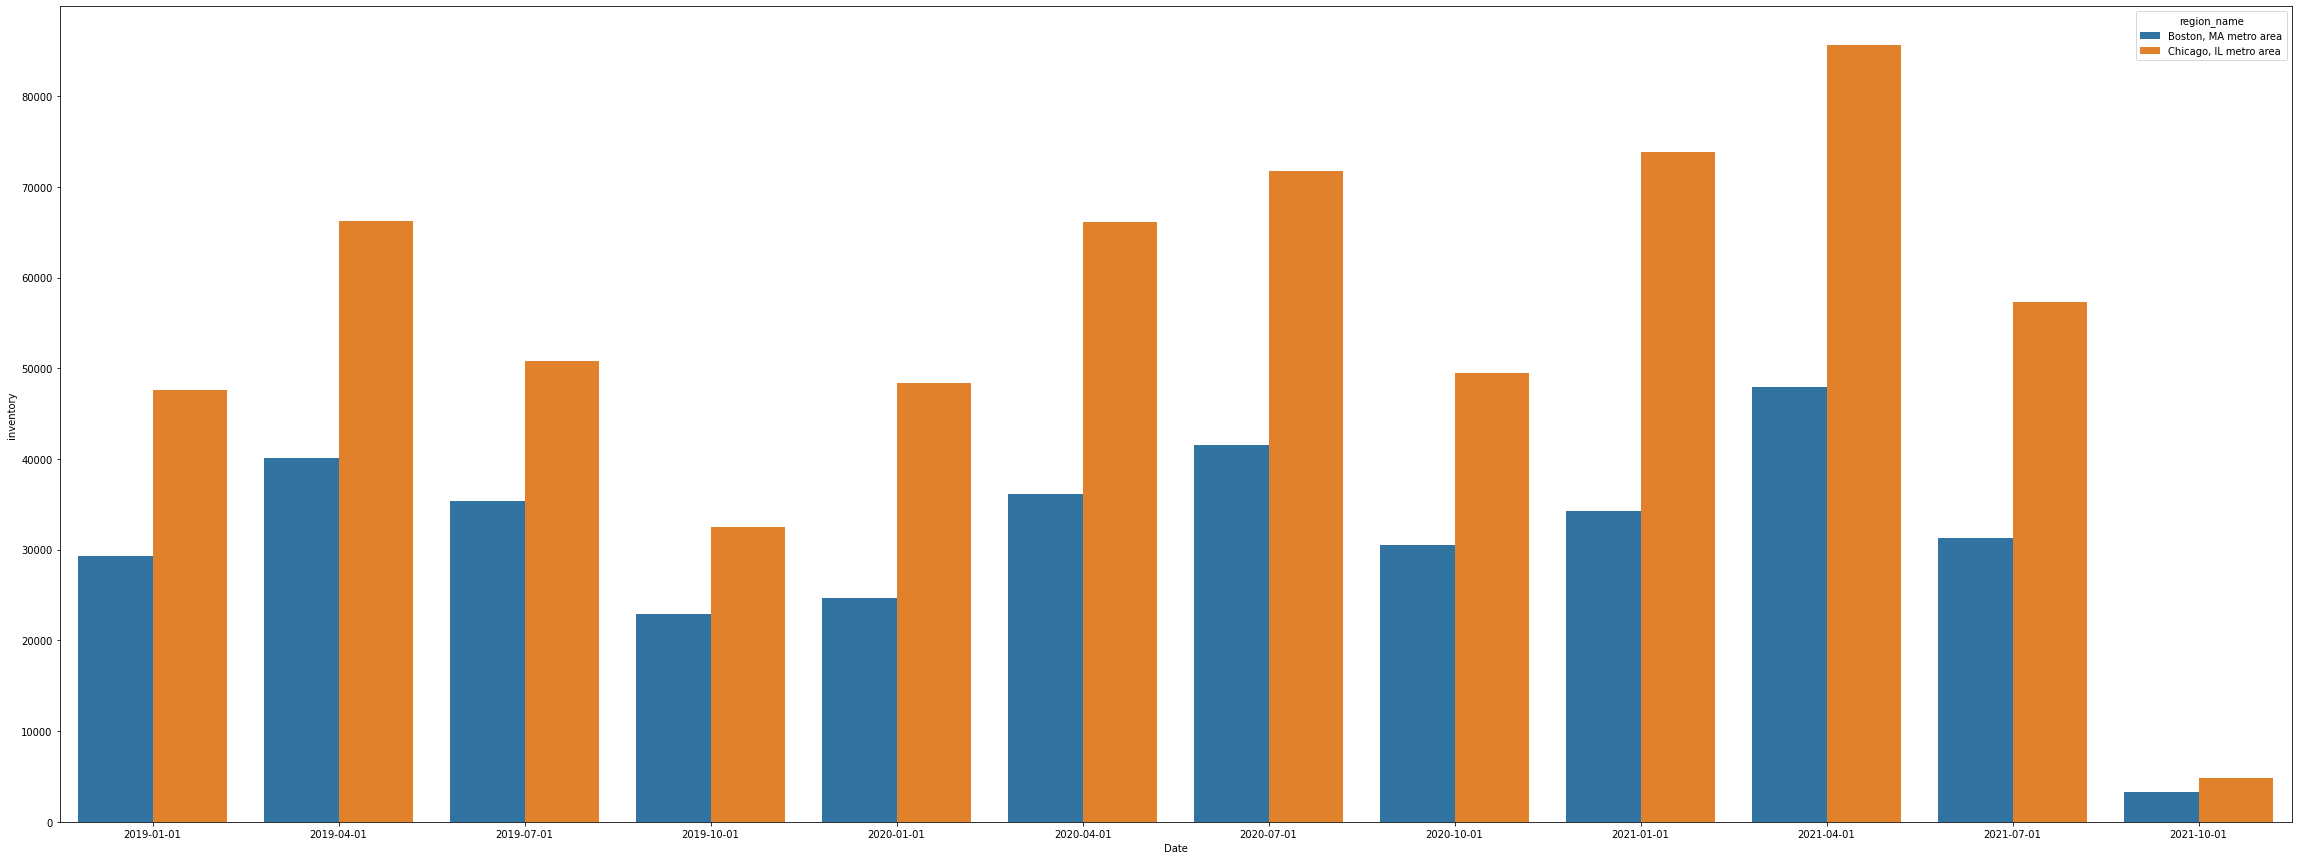

In [ ]:
quarterly_metro_df1 = get_q_data(filtered_df, 'Boston, MA metro area', 'metro', 'inventory')
quarterly_metro_df2 = get_q_data(filtered_df, 'Chicago, IL metro area', 'metro', 'inventory')
frames = [quarterly_metro_df1, quarterly_metro_df2]
quarterly_metro_df = pd.concat(frames)
ax = sb.barplot(x='Date', y='inventory', hue='region_name' ,data=quarterly_metro_df)
plt.xlabel('Date')
plt.ylabel('inventory')
plt.gcf().set_size_inches(40, 15)
plt.show()

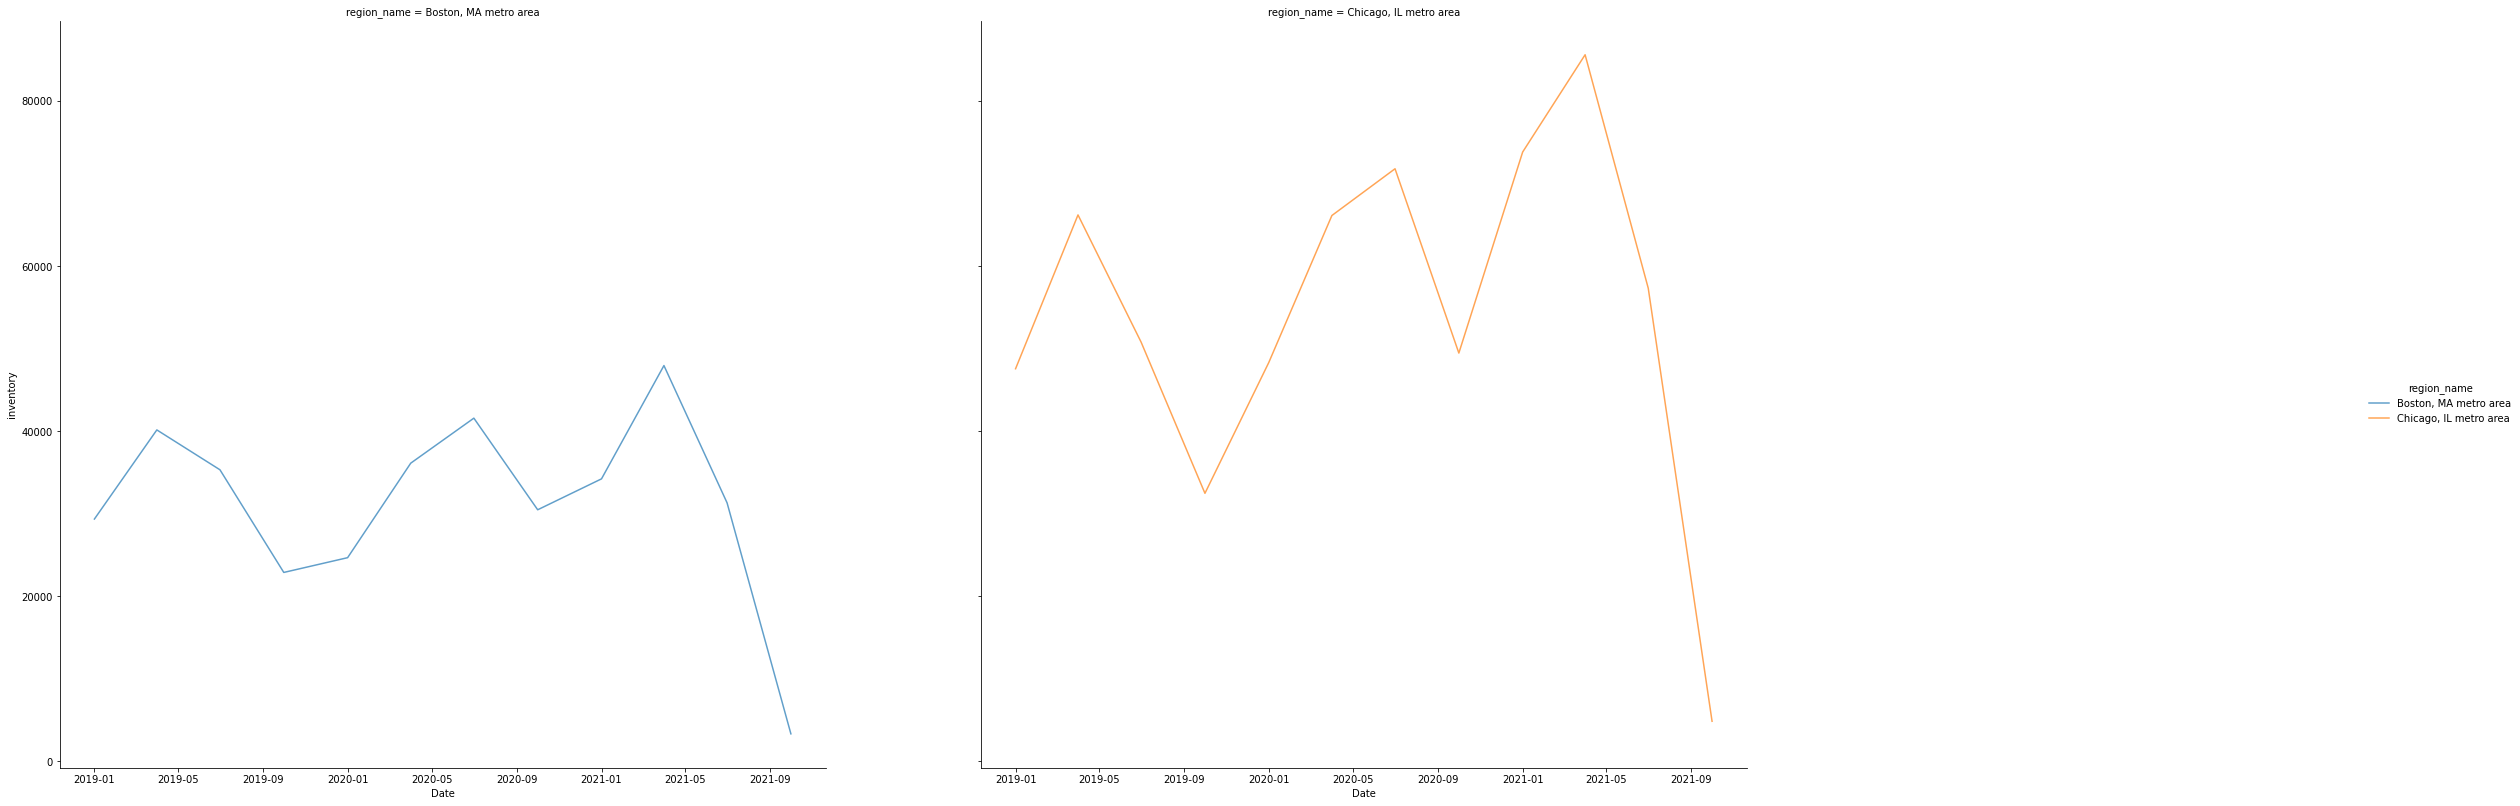

In [ ]:
g = sb.FacetGrid(quarterly_metro_df, col="region_name", hue="region_name")
g.map(sb.lineplot, "Date", "inventory", alpha=.7)
g.add_legend()
plt.gcf().set_size_inches(40, 15)
plt.show()

### Inventory
#### The graph shows the trend in decreasing inventory over the year. For the year 2021 Chicago and Boston have higher numbers of all homes for sale whereas Philadelphia has the lowest.
#### The inventory was very low in the march and april 2021.
#### The home sale from year 2012 - 2021 has been decreased by 14,42,733

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


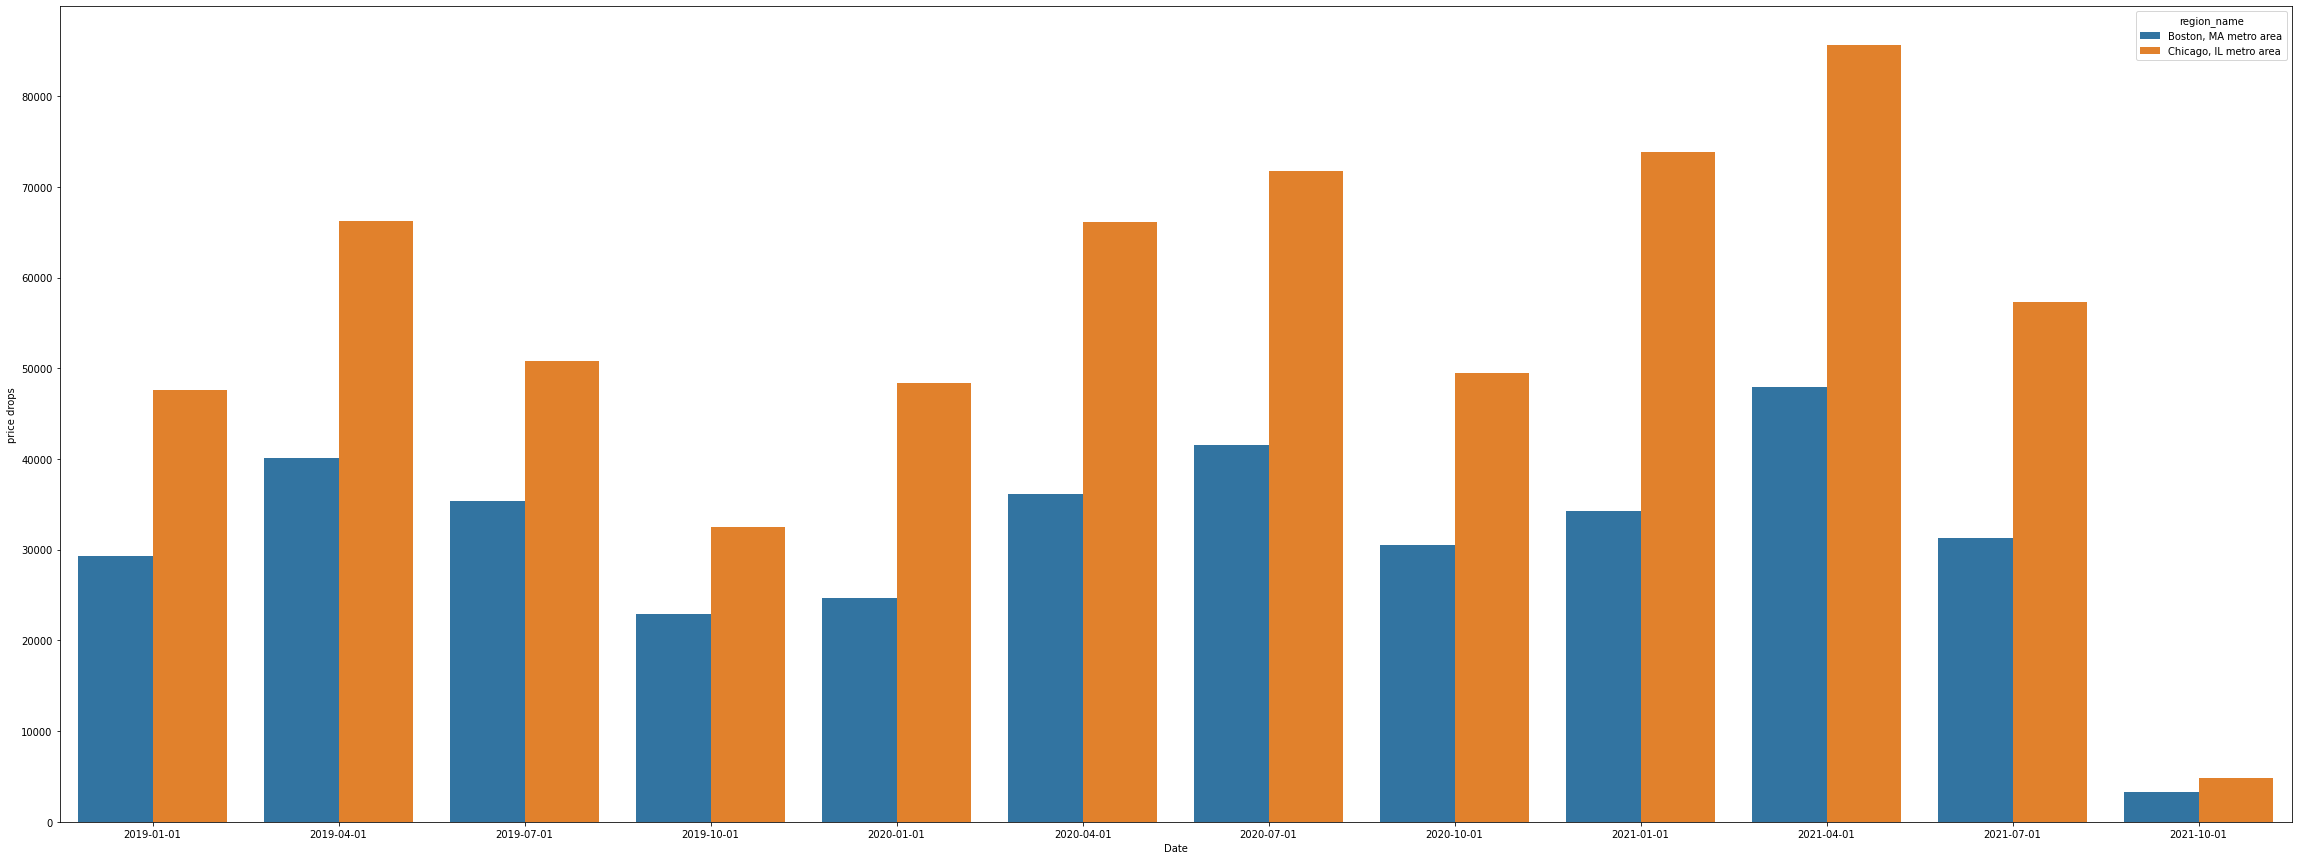

In [ ]:
quarterly_metro_df1 = get_q_data(filtered_df, 'Boston, MA metro area', 'metro', 'price_drops')
quarterly_metro_df2 = get_q_data(filtered_df, 'Chicago, IL metro area', 'metro', 'price_drops')
frames = [quarterly_metro_df1, quarterly_metro_df2]
quarterly_metro_df = pd.concat(frames)
ax = sb.barplot(x='Date', y='price_drops', hue='region_name' ,data=quarterly_metro_df)
plt.xlabel('Date')
plt.ylabel('price drops')
plt.gcf().set_size_inches(40, 15)
plt.show()

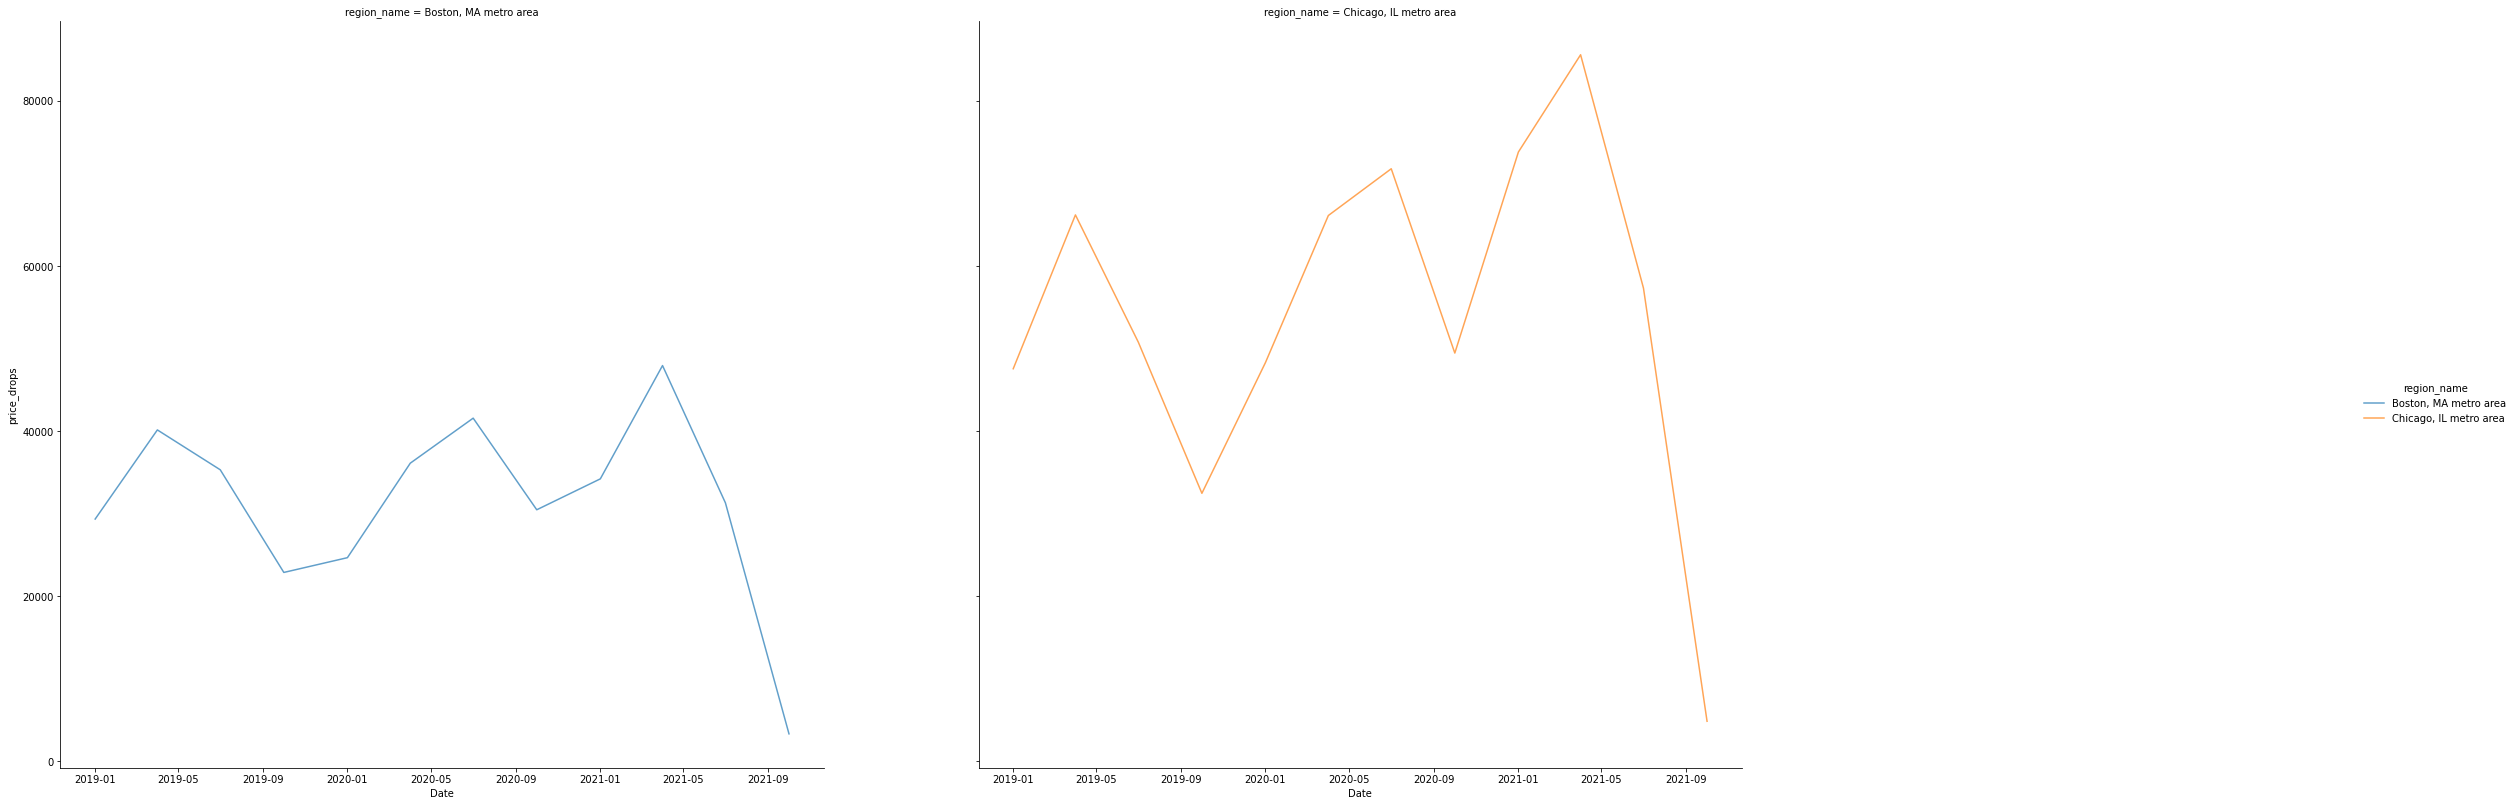

In [ ]:
g = sb.FacetGrid(quarterly_metro_df, col="region_name", hue="region_name")
g.map(sb.lineplot, "Date", "price_drops", alpha=.7)
g.add_legend()
plt.gcf().set_size_inches(40, 15)
plt.show()

### Price Drops
#### The bar and line plots show that over the period of pandemic, from 2019 to 2021, out of the three metro areas, Boston-MA, New York-NY and Chicago-IL.
#### From date 2019-01-01 to 2020-09-30 Chicago has highest price drop followed by newyork and Boston. From date 2020-10-01 to 2021-11-23 Newyork has the highest price drop followed by Chicago and Boston.Chicago has the highest price drop and Boston has the lowest price drop.